In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import plotly.graph_objs as go
import seaborn as sns
sns.set_context('talk')
%matplotlib inline

#Escalado de datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Algoritmos
from sklearn.cluster import KMeans



In [ ]:
sns.set_context("notebook", rc={"grid.linewidth": 0.6, "lines.linewidth": 1})
sns.set_style("whitegrid")
sns.set_palette("Accent_r")

# Uso DATASET generado en notebook anterior (SUPERVISADO)

En la notebook anterior generamos un dataset uniendo los datos del SMN (1 registro por hora) y los datos provistos por ConcientizAR (4 rehistros por minuto). Finalmente generamos un nuevo dataset con un registro por minuto.
   

In [ ]:
# Cargamos los datasets
URL = 'https://drive.google.com/file/d/1YvoIFpX5n_t7bqTlNLt1Vh8wyLRSrvdh/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,TEMP_INT,Power_Factor_Total,Active_Energy_Delivered,FECHA_HORA,FECHA,HORA,TEMP,HUM,PNM,DD,FF,NOMBRE
0,47.08,0.96,119490.08,2021-01-01 00:00:00,1012021.0,0.0,21.000000,51.000000,1012.9,50.0,6.0,CORDOBA OBSERVATORIO
1,47.08,0.93,119490.14,2021-01-01 00:01:00,NaN,NaN,21.003333,50.933333,NaN,49.5,6.0,NaN
2,46.77,0.94,119490.23,2021-01-01 00:02:00,NaN,NaN,21.006667,50.866667,NaN,49.0,6.0,NaN
3,46.77,0.94,119490.29,2021-01-01 00:03:00,NaN,NaN,21.010000,50.800000,NaN,48.5,6.0,NaN
4,46.46,0.94,119490.36,2021-01-01 00:04:00,NaN,NaN,21.013333,50.733333,NaN,48.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
525595,53.21,0.97,264478.88,2021-12-31 23:55:00,NaN,NaN,30.500000,37.000000,NaN,360.0,6.0,NaN
525596,52.90,0.96,264478.94,2021-12-31 23:56:00,NaN,NaN,30.500000,37.000000,NaN,360.0,6.0,NaN
525597,53.52,0.96,264479.00,2021-12-31 23:57:00,NaN,NaN,30.500000,37.000000,NaN,360.0,6.0,NaN
525598,52.90,0.96,264479.06,2021-12-31 23:58:00,NaN,NaN,30.500000,37.000000,NaN,360.0,6.0,NaN


In [ ]:
df.dtypes

TEMP_INT                   float64
Power_Factor_Total         float64
Active_Energy_Delivered    float64
FECHA_HORA                  object
FECHA                      float64
HORA                       float64
TEMP                       float64
HUM                        float64
PNM                         object
DD                         float64
FF                         float64
NOMBRE                      object
dtype: object

In [ ]:
df['FECHA_HORA'] = pd.to_datetime(df.FECHA_HORA).dt.tz_localize(None)

In [ ]:
#Calculo la DEMANDA como la diferencia entre el valor Active_Energy_Delivered(n)-Active_Energy_Delivered(n-1)
df['DEMANDA'] = df['Active_Energy_Delivered'].diff()

In [ ]:
#Calculo las columnas MES, DIA_SEMANA y LABORABLE
df['MES'] = df['FECHA_HORA'].dt.month
df['DIA_SEMANA'] = df['FECHA_HORA'].dt.weekday
df['LABORABLE'] = np.where(df['FECHA_HORA'].dt.weekday<5, 'Laborable', 'No Laborable')

In [ ]:
df

,TEMP_INT,Power_Factor_Total,Active_Energy_Delivered,FECHA_HORA,FECHA,HORA,TEMP,HUM,PNM,DD,FF,NOMBRE,DEMANDA,MES,DIA_SEMANA,LABORABLE
0,47.08,0.96,119490.08,2021-01-01 00:00:00,1012021.0,0.0,21.000000,51.000000,1012.9,50.0,6.0,CORDOBA OBSERVATORIO,NaN,1,4,Laborable
1,47.08,0.93,119490.14,2021-01-01 00:01:00,NaN,NaN,21.003333,50.933333,NaN,49.5,6.0,NaN,0.06,1,4,Laborable
2,46.77,0.94,119490.23,2021-01-01 00:02:00,NaN,NaN,21.006667,50.866667,NaN,49.0,6.0,NaN,0.09,1,4,Laborable
3,46.77,0.94,119490.29,2021-01-01 00:03:00,NaN,NaN,21.010000,50.800000,NaN,48.5,6.0,NaN,0.06,1,4,Laborable
4,46.46,0.94,119490.36,2021-01-01 00:04:00,NaN,NaN,21.013333,50.733333,NaN,48.0,6.0,NaN,0.07,1,4,Laborable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,53.21,0.97,264478.88,2021-12-31 23:55:00,NaN,NaN,30.500000,37.000000,NaN,360.0,6.0,NaN,0.07,12,4,Laborable
525596,52.90,0.96,264478.94,2021-12-31 23:56:00,NaN,NaN,30.500000,37.000000,NaN,360.0,6.0,NaN,0.06,12,4,Laborable
525597,53.52,0.96,264479.00,2021-12-31 23:57:00,NaN,NaN,30.500000,37.000000,NaN,360.0,6.0,NaN,0.06,12,4,Laborable
525598,52.90,0.96,264479.06,2021-12-31 23:58:00,NaN,NaN,30.500000,37.000000,NaN,360.0,6.0,NaN,0.06,12,4,Laborable


In [ ]:
#Tomo solo 1 mes por una cuestion de memoria disponible en el entorno Google Colab
#Tomo solo las columnas MES, DIA_SEMANA, TEMP y DEMANDA
mask = ((df["FECHA_HORA"] > '2021-08-01 00:00:00') & (df["FECHA_HORA"] < '2021-09-30 23:59:59'))
data_df = df[['FECHA_HORA','MES','DIA_SEMANA','TEMP','DEMANDA','LABORABLE']].loc[mask].copy()


In [ ]:
#Hacemos un downsamplig a registro por dia
data_df['FECHA'] = data_df['FECHA_HORA'].dt.floor('24H')
data_df = data_df.groupby('FECHA').agg(TEMP = ('TEMP','max'),DEMANDA = ('DEMANDA','max'),MES = ('MES','last'),DIA_SEMANA = ('DIA_SEMANA','last'),LABORABLE = ('LABORABLE','last')).reset_index()

In [ ]:
data_df.set_index('FECHA',drop=True,inplace=True)

In [ ]:
data_df

,TEMP,DEMANDA,MES,DIA_SEMANA,LABORABLE
FECHA,,,,,
2021-08-01,21.0,0.14,8,6,No Laborable
2021-08-02,22.2,1.95,8,0,Laborable
2021-08-03,24.6,2.89,8,1,Laborable
2021-08-04,21.9,1.81,8,2,Laborable
2021-08-05,23.7,1.53,8,3,Laborable
...,...,...,...,...,...
2021-09-26,27.4,0.13,9,6,No Laborable
2021-09-27,26.2,2.12,9,0,Laborable
2021-09-28,16.6,1.76,9,1,Laborable


In [ ]:
data_reduced_df = data_df[['TEMP','DEMANDA']]
data_escalated_df = StandardScaler().fit_transform(data_reduced_df.values)
X = pd.DataFrame(data_escalated_df, index=data_reduced_df.index, columns=data_reduced_df.columns)

In [ ]:
X

,TEMP,DEMANDA
FECHA,,
2021-08-01,-0.529656,-1.044333
2021-08-02,-0.272043,0.420785
2021-08-03,0.243184,1.181675
2021-08-04,-0.336446,0.307461
2021-08-05,0.049974,0.080813
...,...,...
2021-09-26,0.844283,-1.052427
2021-09-27,0.586669,0.558393
2021-09-28,-1.474239,0.266988


Usamos K-MEANS

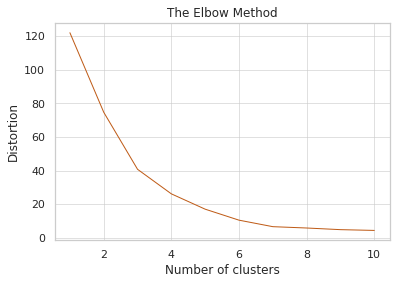

In [ ]:
#Usando el método del "codo" analizamos el número optimo de clusters para el menor DISTORSION
cs = []
for i in range(1, 11):
    modelo = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    modelo.fit(X)
    cs.append(modelo.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
modelo = KMeans(n_clusters=5, random_state=0)
y_kmeans = modelo.fit(X)
# Recuperacion de etiquetas
clusters = y_kmeans.labels_

In [ ]:
#Agregamos el el nro de CLUSTER determinado, a cada registro
data_df['CLUSTER'] = pd.Series(clusters, index=data_df.index)
data_df

,TEMP,DEMANDA,MES,DIA_SEMANA,LABORABLE,CLUSTER
FECHA,,,,,,
2021-08-01,21.0,0.14,8,6,No Laborable,3
2021-08-02,22.2,1.95,8,0,Laborable,0
2021-08-03,24.6,2.89,8,1,Laborable,1
2021-08-04,21.9,1.81,8,2,Laborable,0
2021-08-05,23.7,1.53,8,3,Laborable,1
...,...,...,...,...,...,...
2021-09-26,27.4,0.13,9,6,No Laborable,4
2021-09-27,26.2,2.12,9,0,Laborable,1
2021-09-28,16.6,1.76,9,1,Laborable,0


Visualizamos los clusters

In [ ]:
kmean_clusters = go.Scatter(x=data_df['TEMP'], y=data_df['DEMANDA'],
                           mode='markers',
                           text='Mes: '+data_df['MES'].loc[:].astype(str)+' Día: '+data_df['DIA_SEMANA'].loc[:].astype(str)+' '+data_df['LABORABLE'].loc[:],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='Temp.'),
                yaxis=dict(title='Demanda'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Conclusion 1: el dato TEMP (temperatura) no colabora en una buena segmentación de los datos en clusters relevantes. Vamos a repetir el proceso eliminando ese dato

In [ ]:
X = data_df[['DEMANDA']]
modelo = KMeans(n_clusters=5, random_state=0)
y_kmeans = modelo.fit(X)
# Recuperacion de etiquetas
clusters = y_kmeans.labels_

In [ ]:
data_df['CLUSTER'] = pd.Series(clusters, index=data_df.index)
data_df

,TEMP,DEMANDA,MES,DIA_SEMANA,LABORABLE,CLUSTER
FECHA,,,,,,
2021-08-01,21.0,0.14,8,6,No Laborable,2
2021-08-02,22.2,1.95,8,0,Laborable,0
2021-08-03,24.6,2.89,8,1,Laborable,4
2021-08-04,21.9,1.81,8,2,Laborable,3
2021-08-05,23.7,1.53,8,3,Laborable,3
...,...,...,...,...,...,...
2021-09-26,27.4,0.13,9,6,No Laborable,2
2021-09-27,26.2,2.12,9,0,Laborable,0
2021-09-28,16.6,1.76,9,1,Laborable,3


In [ ]:
kmean_clusters = go.Scatter(x=data_df['DIA_SEMANA'], y=data_df['DEMANDA'],
                           mode='markers',
                           text='Mes: '+data_df['MES'].loc[:].astype(str)+' Día: '+data_df['DIA_SEMANA'].loc[:].astype(str)+' '+data_df['LABORABLE'].loc[:],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='Dia de la Semana'),
                yaxis=dict(title='Demanda'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

